In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

# N=8

In [3]:
# Exact total energy from ED
K_SF_exact = -15.860014702364685   # U/t=0.5
K_PT_exact = -13.817614029746316    # U/t=3.3
K_MOTT_exact = -6.311971443266589  # U/t=10.0

In [4]:
# U/t=10.0
betas = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0])
K_MOTT = np.array([-9.216677955833239, -8.496491562562342, -7.942606062499999, -7.525167107499723, -7.21571051420306, -6.896170286484832, -6.691974111538415, -6.529482327833328, -6.421606245829818, -6.367630085125, -6.326322614468798, -6.315324735083359, -6.3121942679999705, -6.311369131])
K_MOTT_err = np.array([0.00035265920620905917, 0.0003162842678529529, 0.0005221339212567539, 0.000340458506677198, 0.0002755021643084885, 0.0003300833817797116, 0.000259794717811865, 0.0002497962052362116, 0.0002611173744333768, 0.0002636625423021077, 0.00026567606304287095, 0.0002566980011656675, 0.0002597522409023832, 0.0002561950160031872])

# Calculate relative error between exact and estimate energy
K_MOTT_relErr = np.abs((K_MOTT-K_MOTT_exact)/K_MOTT_exact)
K_MOTT_relErr_err = np.abs(K_MOTT_err / K_MOTT_exact)

# U/t=0.5
K_SF = np.array([-15.981517701666668, -15.977119309285452, -15.967632484999998, -15.956052149444913, -15.953461899, -15.94225128000032, -15.93326733153954, -15.926966439545758, -15.91433175379321, -15.905078724042337, -15.891828221084337, -15.879557040572392, -15.873068294111457, -15.870367037600602])
K_SF_err = np.array([0.0017529506769450658, 0.0015773492991399095, 0.002414854189884002, 0.0036807432468727898, 0.0013866074009205344, 0.0017379625224769014, 0.0012153925786807917, 0.0012737340560896098, 0.001181235163216476, 0.0011009885992557824, 0.001156712046974948, 0.001063705505109866, 0.0002392529035073745, 0.0010775998703710648])

# Calculate relative error between exact and estimate energy
K_SF_relErr = np.abs((K_SF-K_SF_exact)/K_SF_exact)
K_SF_relErr_err = np.abs(K_SF_err / K_SF_exact)

# U/t=3.3
K_PT = np.array([-14.825446644999952, -14.656355999999505, -14.519178149999997, -14.407991625556146, -14.316134507000001, -14.206648538261215, -14.123622312308427, -14.042099783333331, -13.971153298285605, -13.9233862065, -13.868099645733334, -13.842562315666665, -13.830177508571419, -13.823579933500001])
K_PT_err = np.array([0.00046574128263647785, 0.0004248181663840309, 0.00038839802327396845, 0.0004086750515306114, 0.00036401730728483615, 0.0003710365126963237, 0.0003269341330040217, 0.00032371859012540413, 0.00031293552197167907, 0.0002863089450584235, 0.0002862931594521855, 0.0002871496297401905, 0.0002894073066165441, 0.0002879603837889953])

# Calculate relative error between exact and estimate energy
K_PT_relErr = np.abs((K_PT-K_PT_exact)/K_PT_exact)
K_PT_relErr_err = np.abs(K_PT_err / K_PT_exact)

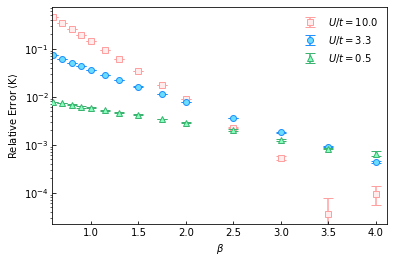

In [5]:
fig,ax1 = plt.subplots()
ax1.set_yscale("log")

# U/t=10.0
ax1.errorbar(betas,K_MOTT_relErr, yerr=K_MOTT_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
# U/t=3.3
ax1.errorbar(betas,K_PT_relErr, yerr=K_PT_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
# U/t=0.5
ax1.errorbar(betas,K_SF_relErr, yerr=K_SF_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle K \rangle$')
ax1.set_xlabel(r'$\beta$')
# ax1.annotate(r"$M=8,N=8,\ell=4$",(0.4,0.50+.30),xycoords='figure fraction')
# ax1.annotate(r"$U=10.000000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction='in')

# Set plot limits
ax1.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)
# ax.set_ylim(np.min()*0.95,np.max(S2_beta1)*1.05);

# # Perform linear fit to ln(y) vs x:
# m,lnB = np.polyfit(betas[9:],np.log(K_PT_relErr)[9:],deg=1)
# B = np.exp(lnB)

# betas_fit = np.linspace(betas[9],6.0,1000)
# ax1.plot(betas_fit,B*np.exp(m*betas_fit))
# ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

# Set legend
plt.legend(frameon=False)

# Save figure
plt.savefig("relativeErrorsK_N8.pdf",dpi=400)
plt.savefig("relativeErrorsK_N8.png",dpi=400)
plt.show()

In [6]:
# Potential energy

In [7]:
# Exact total energy from ED
V_SF_exact = 1.4164745420770473   # U/t=0.5
V_PT_exact = 5.3066065551194335    # U/t=3.3
V_MOTT_exact = 3.1384353992551985  # U/t=10.0

In [8]:
# U/t=10.0
betas = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0])
V_MOTT = np.array([7.002853251, 5.880929289406297, 5.078742092000001, 4.5139133395, 4.119746778855009, 3.738232143554054, 3.5112261735000003, 3.3413210060000003, 3.2352853127720205, 3.185386405, 3.1494020228021964, 3.1404863969999997, 3.1386367215, 3.1381365635])
V_MOTT_err = np.array([0.00026299670819137245, 0.00023756888074496973, 0.0003646112787086708, 0.0002633305816008262, 0.00021172218438060566, 0.0002754416650871281, 0.00021785759639853203, 0.000247543624191631, 0.00024948188328898803, 0.0002645339146299578, 0.0003054457065066396, 0.0003070947392390207, 0.0003286161900372928, 0.00033502269223992237])

# Calculate relative error between exact and estimate energy
V_MOTT_relErr = np.abs((V_MOTT-V_MOTT_exact)/V_MOTT_exact)
V_MOTT_relErr_err = np.abs(V_MOTT_err / V_MOTT_exact)

# U/t=0.5
V_SF = np.array([1.7605571541, 1.7040702736, 1.6599928470499998, 1.6248350632, 1.59669239725, 1.56324684655, 1.5370904627500002, 1.5114106039078157, 1.4879447347194388, 1.4710755639616933, 1.449045682178715, 1.4365126885858588, 1.4291844612663647, 1.4241989611167003])
V_SF_err = np.array([0.00019205508191325288, 0.00018515479366641033, 0.00030223064448638446, 0.00046820517398491737, 0.00016693717220495673, 0.00022605960146682272, 0.00015991002093424994, 0.00017093617901967588, 0.00016000830330115435, 0.00016553900540866467, 0.00016128291020168857, 0.00017974375118255594, 3.98626996707602e-05, 0.00017730792007533808])

# Calculate relative error between exact and estimate energy
V_SF_relErr = np.abs((V_SF-V_SF_exact)/V_SF_exact)
V_SF_relErr_err = np.abs(V_SF_err / V_SF_exact)

# U/t=3.3
V_PT = np.array([6.693781042740036, 6.395550361200019, 6.179833949520034, 6.012649186500044, 5.883039599580051, 5.739577954440056, 5.636025012420058, 5.539610559780059, 5.460411623700059, 5.409829356360057, 5.354034280540056, 5.328595242300055, 5.317238842740054, 5.311612680000055])
V_PT_err = np.array([0.0001614936656960262, 0.00015274953147072362, 0.00013999173125924308, 0.00013174907762411557, 0.00014244585757134434, 0.00013748506127761527, 0.00013426243348493662, 0.00014518598550050706, 0.00015184260070822526, 0.00015049986172700912, 0.00017821776970575637, 0.00017390175787867555, 0.0001842146702648613, 0.00019812652297301225])

# Calculate relative error between exact and estimate energy
V_PT_relErr = np.abs((V_PT-V_PT_exact)/V_PT_exact)
V_PT_relErr_err = np.abs(V_PT_err / V_PT_exact)

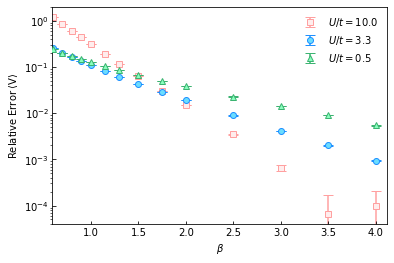

In [9]:
fig,ax1 = plt.subplots()
ax1.set_yscale("log")

# U/t=10.0
ax1.errorbar(betas,V_MOTT_relErr, yerr=V_MOTT_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
# U/t=3.3
ax1.errorbar(betas,V_PT_relErr, yerr=V_PT_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
# U/t=0.5
ax1.errorbar(betas,V_SF_relErr, yerr=V_SF_relErr_err, fmt='.', capsize=5,
            label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle V \rangle$')
ax1.set_xlabel(r'$\beta$')
# ax1.annotate(r"$M=8,N=8,\ell=4$",(0.4,0.50+.30),xycoords='figure fraction')
# ax1.annotate(r"$U=10.000000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction='in')

# Set plot limits
ax1.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)
# ax.set_ylim(np.min()*0.95,np.max(S2_beta1)*1.05);

# # Perform linear fit to ln(y) vs x:
# m,lnB = np.polyfit(betas[9:],np.log(V_PT_relErr)[9:],deg=1)
# B = np.exp(lnB)

# betas_fit = np.linspace(betas[9],6.0,1000)
# ax1.plot(betas_fit,B*np.exp(m*betas_fit))
# ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

# Set legend
plt.legend(frameon=False)

# Save figure
plt.savefig("relativeErrorsV_N8.pdf",dpi=400)
plt.savefig("relativeErrorsV_N8.png",dpi=400)
plt.show()

In [10]:
# Combined plot

In [11]:
from matplotlib import gridspec

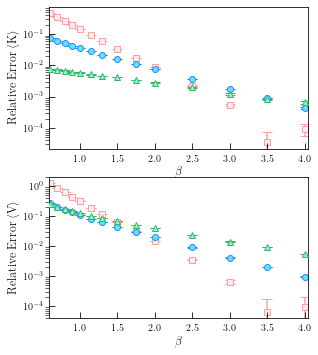

In [12]:
with plt.style.context('../IOP_large.mplstyle2'):

    # Kinetic energies subplot
    fig, ax = plt.subplots(2,1)
    ax3 = ax[0]
    
    ax3.set_yscale("log")

    # U/t=10.0
    ax3.errorbar(betas,K_MOTT_relErr, yerr=K_MOTT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
    # U/t=3.3
    ax3.errorbar(betas,K_PT_relErr, yerr=K_PT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
    # U/t=0.5
    ax3.errorbar(betas,K_SF_relErr, yerr=K_SF_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)

    ax3.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle K \rangle$')
    ax3.set_xlabel(r'$\beta$')
    # ax1.annotate(r"$M=8,N=8,\ell=4$",(0.4,0.50+.30),xycoords='figure fraction')
    # ax1.annotate(r"$U=10.000000$",(0.60,0.40+.30),xycoords='figure fraction')
    ax3.axhline(0,color="#888888",zorder=-1)
    ax3.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax3.tick_params(direction='in')
    
    # Set plot limits
    # ax3.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)
    # ax.set_ylim(np.min()*0.95,np.max(S2_beta1)*1.05);

    # # Perform linear fit to ln(y) vs x:
    # m,lnB = np.polyfit(betas[9:],np.log(K_PT_relErr)[9:],deg=1)
    # B = np.exp(lnB)

    # betas_fit = np.linspace(betas[9],6.0,1000)
    # ax1.plot(betas_fit,B*np.exp(m*betas_fit))
    # ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

    # Potential energies plot (bottom)
    ax4 = ax[1]
    ax4.set_yscale("log")

    # U/t=10.0
    ax4.errorbar(betas,V_MOTT_relErr, yerr=V_MOTT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
    # U/t=3.3
    ax4.errorbar(betas,V_PT_relErr, yerr=V_PT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
    # U/t=0.5
    ax4.errorbar(betas,V_SF_relErr, yerr=V_SF_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)

    ax4.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle V \rangle$')
    ax4.set_xlabel(r'$\beta$')
    # ax1.annotate(r"$M=8,N=8,\ell=4$",(0.4,0.50+.30),xycoords='figure fraction')
    # ax1.annotate(r"$U=10.000000$",(0.60,0.40+.30),xycoords='figure fraction')
    ax4.axhline(0,color="#888888",zorder=-1)
    ax4.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax4.tick_params(direction='in')

    # Set plot limits
    # ax4.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)
    # ax.set_ylim(np.min()*0.95,np.max(S2_beta1)*1.05);

    # # Perform linear fit to ln(y) vs x:
    # m,lnB = np.polyfit(betas[9:],np.log(V_PT_relErr)[9:],deg=1)
    # B = np.exp(lnB)

    # betas_fit = np.linspace(betas[9],6.0,1000)
    # ax1.plot(betas_fit,B*np.exp(m*betas_fit))
    # ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

    # Set legend
#     plt.legend(frameon=False)

    # Save figure
    # plt.savefig("relativeErrorsV_N8.pdf",dpi=400)
    # plt.savefig("relativeErrorsV_N8.png",dpi=400)
    # plt.show()

    # Save figure
    # plt.savefig("relativeErrorsK_N8.pdf",dpi=400)
    # plt.savefig("relativeErrorsK_N8.png",dpi=400)
    # plt.show()

    plt.savefig("relativeErrorsTK_N8.pdf",dpi=400)
    plt.savefig("relativeErrorsTK_N8.png",dpi=400)